# Titanic : Machine Learning from Disaster

## 1 - Importing Libraries
* **Keras from Tensorflow** - for Deep Learning
* **Pandas** - for Data Manipulation
* **Numpy** - for Special Features
* **Matplotlib** - for Data Visualization
* **Random** - for Data Correction

In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

print("Librairies successfully imported")

# Clearing the session
keras.backend.clear_session()

# Checking the versions
print(" - Tensorflow version: ", tf.__version__)
print(" - Keras version: ", keras.__version__)
print(" - Pandas version: ", pd.__version__)
print(" - Numpy version: ", np.__version__)
print(" - Matplotlib version: ", plt.matplotlib.__version__)
print(" - Random version: ", "NaN")


Librairies successfully imported
 - Tensorflow version:  2.9.0
 - Keras version:  2.9.0
 - Pandas version:  2.0.0
 - Numpy version:  1.23.5
 - Matplotlib version:  3.7.1
 - Random version:  NaN


## 2 - Load data

In [2]:
data_folder_path = "data_titanic/"

# Loading the data
raw_train_data = pd.read_csv(data_folder_path + "train.csv")
raw_test_data = pd.read_csv(data_folder_path + "test.csv")

print("Data successfully loaded")

Data successfully loaded


## 3 - Data Preprocessing

### 3.1 - Data Visualization

In [3]:
# Displaying the first 5 rows of the training data
raw_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 - Looking for missing values

In [4]:
# Pandas filter for missing values
missing_value_filter_train_data = raw_train_data.isna().sum()[raw_train_data.isna().sum() > 0]
missing_value_filter_test_data = raw_test_data.isna().sum()[raw_test_data.isna().sum() > 0]

training_data_size = len(raw_train_data)
test_data_size = len(raw_test_data)

# Displaying the missing values for the training data
print("Missing values for the training data:")
for column_name, missing_value_number in missing_value_filter_train_data.items():
    print(" - ", column_name, ": ", missing_value_number,' / ', training_data_size)

# Displaying the missing values for the test data
print("Missing values for the test data:")
for column_name, missing_value_number in missing_value_filter_test_data.items():
    print(" - ", column_name, ": ", missing_value_number,' / ', test_data_size)

Missing values for the training data:
 -  Age :  177  /  891
 -  Cabin :  687  /  891
 -  Embarked :  2  /  891
Missing values for the test data:
 -  Age :  86  /  418
 -  Fare :  1  /  418
 -  Cabin :  327  /  418


### 3.3 - Strategy to fix missing values

Let's go through the features one by one and see what we can do about the missing values : 
* **Cabin** : In both data sets most of the values are missing, so we can drop this feature.
* **Embarked** : There are only 2 missing values in the training set, so, in order not to polute the data, we can drop these 2 rows.
* **Fare** : There is only 1 missing value in the test set, so we can replace it with the mean value of the feature.
* **Age** : Is a key feature but is missing a lot in both sets. Simply replacing the missing values by the mean of it might not be the best solution as this omnipresence of the mean value may polute our model. The solution here would be to first look at the representation of ages in the data sets and give random ages to the missing values according to the distribution of the ages in the data sets : if the repartition looks like a Gauss repartition we will give random ages according to a Gauss distribution, if it looks like a uniform repartition we will give random ages according to a uniform distribution, etc.

**Warning :** In order to get a "good" repartition, we should create a batch of data sets, test them, and finally sellect the best one only.


### 3.4 - Fixing the data for Cabin, Embarked and Fare

In [5]:
# Droping the Cabin feature
raw_train_data.drop(columns=['Cabin'], inplace=True)
raw_test_data.drop(columns=['Cabin'], inplace=True)

# Droping the raws with missing Embarked values
raw_train_data.dropna(subset=['Embarked'], inplace=True)

# Filling the missing values for the Fare feature
mean_Fare_train = raw_train_data['Fare'].mean()
mean_Fare_test = raw_test_data['Fare'].mean()
filled_value = round((mean_Fare_train*(training_data_size-2) + mean_Fare_test*(test_data_size-1))/(training_data_size+test_data_size-3),1)
raw_test_data['Fare'].fillna(filled_value, inplace=True)
print("Fare missing values filled by : ", filled_value)

Fare missing values filled by :  33.2


### 3.5 - Fixing the data for Age

Let's first have a look at the repartition of the ages in the data sets.

Mean age for the training data:  29.6
Standard deviation for the training data:  14.5
Mean age for the test data:  30.3
Standard deviation for the test data:  14.2


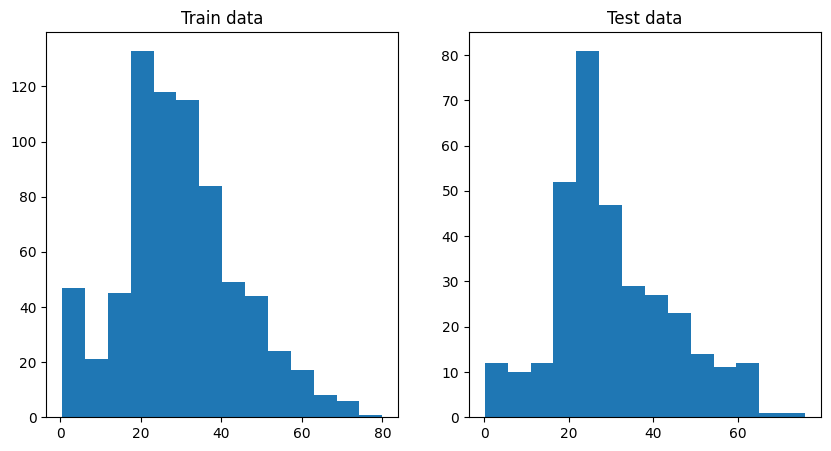

In [6]:
# Let's clean the data for representing the age
rep_train = raw_train_data["Age"].dropna()
rep_test = raw_test_data["Age"].dropna()

# Getting the mean and the standard deviation
mean_age_train = round(rep_train.mean(),1)
std_age_train = round(rep_train.std(),1)
mean_age_test = round(rep_test.mean(),1)
std_age_test = round(rep_test.std(),1)

print("Mean age for the training data: ", mean_age_train)
print("Standard deviation for the training data: ", std_age_train)
print("Mean age for the test data: ", mean_age_test)
print("Standard deviation for the test data: ", std_age_test)

# Creating histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.hist(rep_train, bins=14)
ax1.set_title("Train data")


ax2.hist(rep_test, bins=14)
ax2.set_title("Test data")

plt.show()

What's great about the graphs and data mean and standarad deviation is that they all are coherent.

For the next step, let's assume those repartitions are Gauss repartitions with a mean of 30 and a standard deviation of 14.4. 

Now, we only have to create the correct distribution.

In [7]:
# Creation of the distribution
def distrib():
    return max(0, rd.gauss( 30, 14.4))

Let's generate the missing data with our distribution.

In [8]:
# Replace the missing values by the distribution
raw_test_data['Age'].fillna(raw_test_data['Age'].apply(lambda x: distrib()), inplace=True)
raw_train_data['Age'].fillna(raw_train_data['Age'].apply(lambda x: distrib()), inplace=True)

### 3.6 - Checking the data

In [9]:
# Re-checking the missing values
number_of_missing_values_train = raw_train_data.isna().sum()[raw_train_data.isna().sum() > 0].sum()
number_of_missing_values_test = raw_test_data.isna().sum()[raw_test_data.isna().sum() > 0].sum()
print("Number of missing values for the training data: ", number_of_missing_values_train)
print("Number of missing values for the test data: ", number_of_missing_values_test)

# Renaming the data
clean_train_data = raw_train_data
clean_test_data = raw_test_data
print()
print("Data successfully cleaned")

Number of missing values for the training data:  0
Number of missing values for the test data:  0

Data successfully cleaned


## 4 - Data Normalizing and usable datasets creation

### 4.1 - Data tranformation to categorical values
A few modification on the data will be made :
* The PassengerId column will be dropped.
* The name column will be dropped as it is not relevant for the model.
* The Ticket column will be dropped too as it doen't semm to give any information.
* The Embarked feature will be tranformed reagarding the chronological steps of the Titanic Journey : Southampton -> Cherbourg -> Queenstown. Thus, we will perform the following transformation :
    * S -> 0
    * C -> 1
    * Q -> 2
* The Sex feature will be transformed as followed :
    * male -> 0
    * female -> 1

In [10]:
# Droping the PassengerId, Name and Ticket features
clean_test_data.drop(columns=['Name', 'Ticket'], inplace=True)
clean_train_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Replacing the Embarked feature by a numerical feature
clean_train_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
clean_test_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

# Replacing the gender feature by a numerical feature
clean_train_data['Sex'].replace(['male','female'], [0, 1], inplace=True)
clean_test_data['Sex'].replace(['male','female'], [0, 1], inplace=True)

### 4.2 - Data Normalizing

In [11]:
# Normalizing the train data set
for label in clean_train_data.columns:
    if label != 'Survived':
        mean = clean_train_data[label].mean()
        std = clean_train_data[label].std()
        clean_train_data[label] = clean_train_data[label].apply(lambda x: (x-mean)/std)

# Normalizing the test data set
for label in clean_test_data.columns:
    if label != 'PassengerId':
        mean = clean_test_data[label].mean()
        std = clean_test_data[label].std()
        clean_test_data[label] = clean_test_data[label].apply(lambda x: (x-mean)/std)

### 4.3 - Data Shuffling and Splitting

In [12]:
# Shuffling the data
data = clean_train_data.sample(frac=1)

# Spliting the data
validation_data = data.sample(frac=0.2)
train_data = data.drop(validation_data.index)

# Creation of the entries and exits of our neural network
X_train = train_data.drop(columns=['Survived'])
Y_train = train_data['Survived']

X_validation = validation_data.drop(columns=['Survived'])
Y_validation = validation_data['Survived']

X_test = clean_test_data



print("Data in ready to be used for the training of the neural network")
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

Data in ready to be used for the training of the neural network
X_train shape:  (711, 7)
Y_train shape:  (711,)


## 5 - Model Creation

In [13]:
shape = X_train.shape[1] # = 7

# Creation of the model
model = keras.models.Sequential()
model.add(keras.layers.Input(shape))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilation of the model
model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


## 6 - Model Training

*Note : to select the bet model, we will choose the one that has the best accuracy on the validation set.*

In [14]:
save_directory = "prediction_titanic/best_model_v2.h5"

# Creation of a callback to save the best model
callback = keras.callbacks.ModelCheckpoint(filepath=save_directory, save_best_only=True, verbose=1, monitor='val_accuracy')

# Training the model
history = model.fit(  X_train, Y_train,
                      batch_size      = 10,
                      epochs          = 100,
                      verbose         = 1,
                      callbacks       = [callback],
                      validation_data = (X_validation, Y_validation))

Epoch 1/100
61/72 [========================>.....] - ETA: 0s - loss: 0.7312 - accuracy: 0.4934
Epoch 1: val_accuracy improved from -inf to 0.70787, saving model to prediction_titanic\best_model_v1.h5
72/72 [==============================] - 1s 6ms/step - loss: 0.7219 - accuracy: 0.5246 - val_loss: 0.6578 - val_accuracy: 0.7079
Epoch 2/100
39/72 [===============>..............] - ETA: 0s - loss: 0.6009 - accuracy: 0.7821
Epoch 2: val_accuracy improved from 0.70787 to 0.78652, saving model to prediction_titanic\best_model_v1.h5
72/72 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7820 - val_loss: 0.5575 - val_accuracy: 0.7865
Epoch 3/100
37/72 [==============>...............] - ETA: 0s - loss: 0.4740 - accuracy: 0.8270
Epoch 3: val_accuracy improved from 0.78652 to 0.79213, saving model to prediction_titanic\best_model_v1.h5
72/72 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8045 - val_loss: 0.4989 - val_accuracy: 0.7921
Epoch 4

## 7 - Model Evaluation

Let's see how our model is performing during the training.

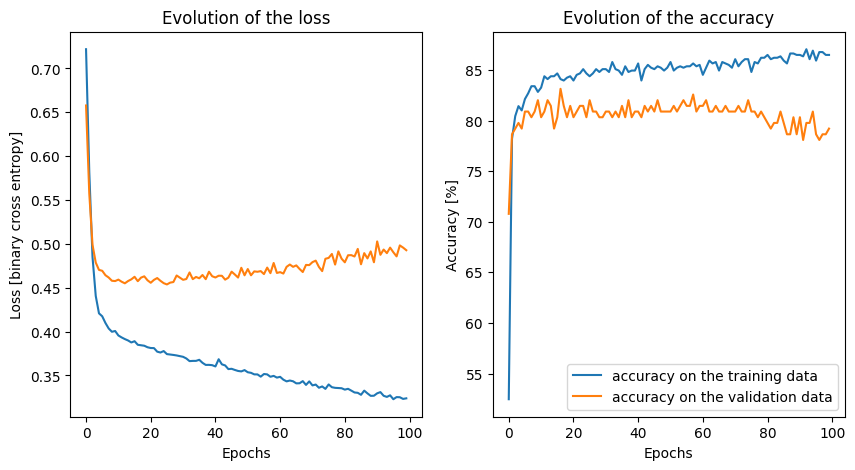

In [15]:
# Getting the evolution of the loss and the accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = np.array(history.history['accuracy'])*100
val_acc    = np.array(history.history['val_accuracy'])*100

# Plotting the evolution of the loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(train_loss, label='loss on the training data')
ax1.plot(val_loss, label='loss on the validation data')
ax1.set_title('Evolution of the loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss [binary cross entropy]')

ax2.plot(train_acc, label='accuracy on the training data')
ax2.plot(val_acc, label='accuracy on the validation data')
ax2.set_title('Evolution of the accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy [%]')

plt.legend()
plt.show()

How perfomant is the best model we can get ?

In [16]:
# Loading the best model
best_model = keras.models.load_model(save_directory)

# Best model evaluation
acc_val = round(best_model.evaluate(X_validation, Y_validation)[1]*100,1)
acc_train = round(best_model.evaluate(X_train, Y_train)[1]*100, 1)
print("Best model accuracy on the validation data: ", acc_val,'%')
print("Best model accuracy on the training data: ", acc_train,'%')


23/23 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8467
Best model accuracy on the validation data:  83.1 %
Best model accuracy on the training data:  84.7 %


## 8 - Prediction

In [20]:
# Prediction of the test data
survival_prediction = best_model.predict(X_test.drop(columns=['PassengerId'])).flatten()
prediction = pd.DataFrame({'PassengerId': X_test['PassengerId'], 'Survived': [round(x) for x in survival_prediction]})

# Show somme of the first predictions
prediction.head()

# Saving the prediction
prediction.to_csv('prediction_titanic/prediction_v2.csv', index=False)

14/14 [==============================] - 0s 997us/step
